In [186]:
import pandas as pd
import numpy as np

In [187]:
df=pd.read_csv("/content/unfiltered-2023-24.csv",sep=";")
df2=pd.read_csv("/content/filtered-2012-24.csv",sep=";")

<ipython-input-187-0029725053f7>:2: DtypeWarning: Columns (1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv("/content/filtered-2012-24.csv",sep=";")


In [188]:
df.head() #unfiltered data

id  date  day month  year  \
0  1736559943.M160578P514254Q11520R2e4b7370488e47...    17  Sun   Sep  2023   
1  1736561544.M716932P527668Q24767R4ade6278d0a834...    12  Fri   Jul  2024   
2  1736559355.M625357P509150Q6502R5040e9178e39c35...    26  Fri   May  2023   
3  1736559980.M827052P514587Q11853R27171101d272bb...    23  Sat   Sep  2023   
4  1736560550.M180200P519430Q16667Raeabd6840bd99a...    10  Wed   Jan  2024   

       time timezone        from-domain  from-self  size-bytes  ...   spam  \
0  00:00:09  '+0530'         iitb.ac.in      False        4133  ...  False   
1  12:29:35  '-0400'          GMAIL.COM      False       91167  ...  False   
2  07:10:24  '+0530'         iitb.ac.in      False        9615  ...  False   
3  14:36:51  '+0000'          polimi.it      False       16899  ...  False   
4  20:37:10  '+0100'  IMT-ATLANTIQUE.FR      False      107311  ...  False   

   spam-score                agent    zip   html    pdf    doc    ppt  \
0        -4.9            NOT FOUND  False   True  False  False  False   
1        -1.7            NOT FOUND  False  False  False  False  False   
2        -6.0            NOT FOUND  False   True  False  False  False   
3        -2.0            NOT FOUND  False   True  False  False  False   
4        -1.8  Mozilla Thunderbird  False   True  False  False  False   

   calendar  image  
0     False  False  
1     False  False  
2     False  False  
3     False  False  
4     False   True  

[5 rows x 24 columns]

In [189]:
df2.head()#filtered data

id date  day month  year      time timezone  \
0   1346928835.6939_745.origin:2,S   18  Wed   Jul  2012  23:51:13  '+0530'   
1   1346928827.6939_203.origin:2,S   02  Mon   Jul  2012  21:20:05  '+0530'   
2   1346928832.6939_533.origin:2,S   27  Fri   Jul  2012  12:08:17  '+0530'   
3  1346928842.6939_1221.origin:2,S   19  Sun   Aug  2012  05:14:22  '+0000'   
4    1346928825.6939_75.origin:2,S   25  Mon   Jun  2012  08:55:02  '+0530'   

  from-domain  from-self  size-bytes  ...   spam  spam-score  \
0  iitb.ac.in      False       14651  ...  False      -100.0   
1  iitb.ac.in      False        2757  ...  False      -100.0   
2  iitb.ac.in      False        6555  ...  False      -100.0   
3  iitb.ac.in      False        4574  ...  False      -100.0   
4  iitb.ac.in      False        5059  ...  False      -100.0   

                                               agent    zip   html    pdf  \
0  Mozilla/5.0 (X11; Linux x86_64; rv:13.0) Gecko...  False   True  False   
1                                          NOT FOUND  False  False  False   
2                                          NOT FOUND  False  False  False   
3                                          NOT FOUND  False  False  False   
4                                          NOT FOUND  False  False  False   

     doc    ppt  calendar  image  
0  False  False     False  False  
1  False  False     False  False  
2  False  False     False  False  
3  False  False     False  False  
4  False  False     False  False  

[5 rows x 24 columns]

In [190]:
df=df[df["day"]!="NOT FOUND"] #DROPPED "rows" WHICH HAVE NON-FOUND VALUES

# **QUESTION -1**

     Total Emails  Average Emails
day                              
Fri          5351       51.451923
Mon          5764       55.423077
Sat          2225       21.394231
Sun          1944       18.692308
Thu          5525       53.125000
Tue          5819       55.951923
Wed          5895       56.682692
   day  variance_per_day
0  Mon        404.605402
1  Tue        432.746752
2  Wed        482.156408
3  Thu        354.857422
4  Fri        411.729674
5  Sat        105.151481
6  Sun         76.154771


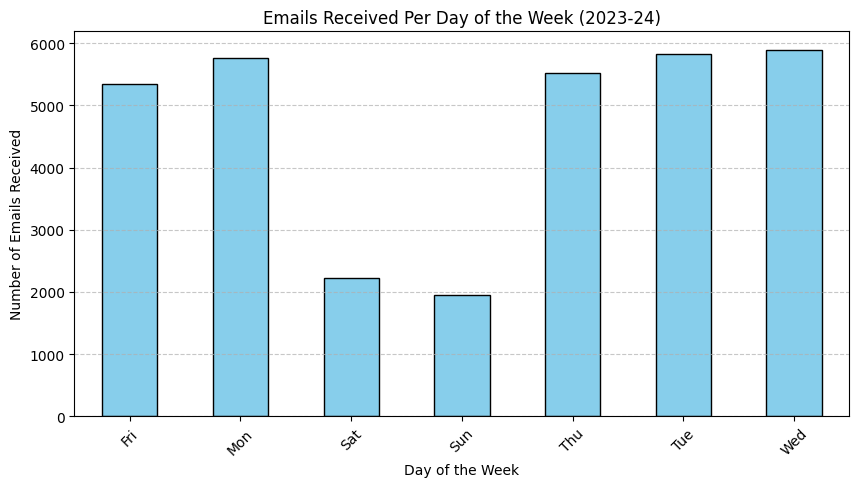

In [191]:
import matplotlib.pyplot as plt
email_counts = df.groupby("day").size()

variance_per_day=[]

for i in ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]:
  day_count=df[df["day"]==i].groupby(["date","month","year"]).size()

  var=((day_count-(email_counts[i]/104))**2).mean()
  variance_per_day.append(var)

email_stats = pd.DataFrame({
    "Total Emails": email_counts,
    "Average Emails": email_counts / 104
}).sort_index()
print(email_stats)

variance_df = pd.DataFrame({
    "day": ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
    "variance_per_day": variance_per_day
})

# Print the variance DataFrame
print(variance_df)

# Plot the data
plt.figure(figsize=(10, 5))
email_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Emails Received")
plt.title("Emails Received Per Day of the Week (2023-24)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()




# **QUESTION-4**

In [192]:
df_unfiltered = df[df["year"].isin([2023, 2024,2025])]
df_filtered = df2[df2["year"].isin([2023, 2024,2025])]

In [193]:
df_unfiltered.shape[0]
df_filtered.shape[0]
removed=df_unfiltered.shape[0]-df_filtered.shape[0]
fraction = removed/df_unfiltered.shape[0]
print("No. of emails removed by the professor in year 2023,2024 and 2025: " ,removed)
print("fraction :",fraction)

No. of emails removed by the professor in year 2023,2024 and 2025:  19813
fraction : 0.6091996433293362


# **QUESTION-5**

In [194]:
# Separating HTML and Non-HTML emails in both datasets
html_unfiltered = df_unfiltered[df_unfiltered["html"] == True]
html_filtered = df_filtered[df_filtered["html"] == True]

non_html_unfiltered = df_unfiltered[df_unfiltered["html"] == False]
non_html_filtered = df_filtered[df_filtered["html"] == False]


prb1= html_filtered.shape[0]/html_unfiltered.shape[0]
prb2= non_html_filtered.shape[0]/non_html_unfiltered.shape[0]
print("probability of deletion of html content =" ,1- prb1)
print("probability of deletion of non-html content =" ,1- prb2)



probability of deletion of html content = 0.5800891181988743
probability of deletion of non-html content = 0.7165297593313158


**Since probability of deletion of non-html email is high , so it is more likely to be deleted**

# **QUESTION-6**

In [195]:
attachment_columns = ["pdf", "doc", "ppt", "image"]

with_attachments_unfiltered = df_unfiltered[df_unfiltered[attachment_columns].any(axis=1)]
with_attachments_filtered = df_filtered[df_filtered[attachment_columns].any(axis=1)]

without_attachments_unfiltered = df_unfiltered[~df_unfiltered[attachment_columns].any(axis=1)]
without_attachments_filtered = df_filtered[~df_filtered[attachment_columns].any(axis=1)]

prb1 = with_attachments_filtered.shape[0] / with_attachments_unfiltered.shape[0] if with_attachments_unfiltered.shape[0] > 0 else 0
prb2 = without_attachments_filtered.shape[0] / without_attachments_unfiltered.shape[0] if without_attachments_unfiltered.shape[0] > 0 else 0

# deletion probabilities
del_prob_with_attachments = 1 - prb1
del_prob_without_attachments = 1 - prb2

print("Probability of deletion of emails with attachments =", del_prob_with_attachments)
print("Probability of deletion of emails without attachments =", del_prob_without_attachments)

if del_prob_with_attachments > del_prob_without_attachments:
    print("\nEmails with attachments are more likely to be deleted.")
elif del_prob_with_attachments < del_prob_without_attachments:
    print("\nEmails without attachments are more likely to be deleted.")
else:
    print("\nBoth types of emails have the same probability of deletion.")

Probability of deletion of emails with attachments = 0.37096313232352096
Probability of deletion of emails without attachments = 0.6379203417861081

Emails without attachments are more likely to be deleted.


**Since the probability of deletion of emails without attachement is high so it is more likely to be deleted.**

# **QUESTION-7**

<ipython-input-196-87c537a4d100>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unfiltered["month"] = pd.Categorical(df_unfiltered["month"], categories=month_order, ordered=True)
<ipython-input-196-87c537a4d100>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  email_counts = df_unfiltered.groupby(["year", "month"]).size().reset_index(name="email_count")


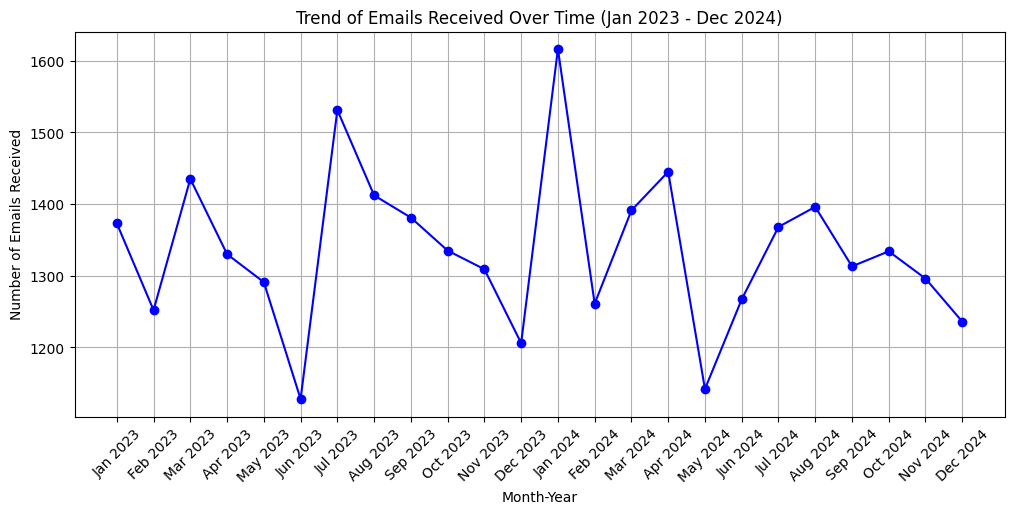

In [196]:
df_unfiltered = df[(df["year"] == 2023) |
                              (df["year"] == 2024) ]

month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Converting month column to categorical for correct sorting
df_unfiltered["month"] = pd.Categorical(df_unfiltered["month"], categories=month_order, ordered=True)

# Counting emails received per (year, month)
email_counts = df_unfiltered.groupby(["year", "month"]).size().reset_index(name="email_count")


email_counts = email_counts.sort_values(by=["year", "month"])

email_counts["time"] = email_counts["month"].astype(str) + " " + email_counts["year"].astype(str)

plt.figure(figsize=(12, 5))
plt.plot(email_counts["time"], email_counts["email_count"], marker='o', linestyle='-', color='b')

plt.xlabel("Month-Year")
plt.ylabel("Number of Emails Received")
plt.title("Trend of Emails Received Over Time (Jan 2023 - Dec 2024)")
plt.xticks(rotation=45)
plt.grid(True)


plt.show()


**No,it is not true, we can observe from the graph that the number of emails received is not increasing nor decreasing continuously from past 2 years. It is not following any trend.**

# **QUESTION-8**

<ipython-input-197-babfa394b5c9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  email_counts = df_unfiltered.groupby(["year", "month"]).size().reset_index(name="email_count")


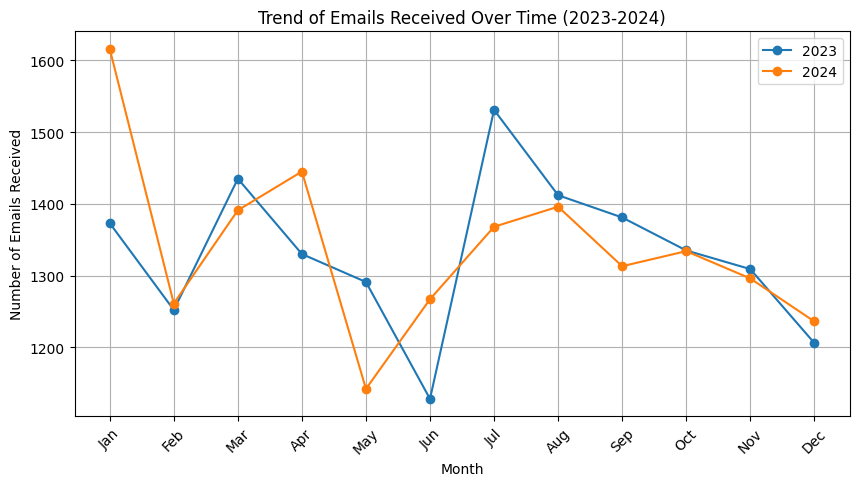

In [197]:
email_counts = df_unfiltered.groupby(["year", "month"]).size().reset_index(name="email_count")


email_counts = email_counts.sort_values(by=["year", "month"])


month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
email_counts["month"] = pd.Categorical(email_counts["month"], categories=month_order, ordered=True)


plt.figure(figsize=(10, 5))
for year in [2023, 2024]:
    subset = email_counts[email_counts["year"] == year]
    plt.plot(subset["month"], subset["email_count"], marker='o', label=str(year))

plt.xlabel("Month")
plt.ylabel("Number of Emails Received")
plt.title("Trend of Emails Received Over Time (2023-2024)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


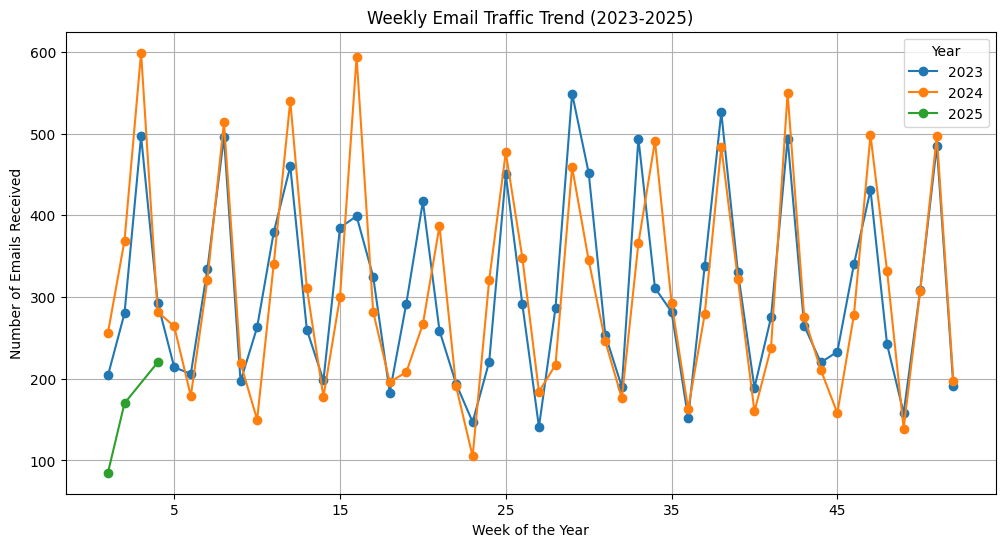

In [198]:


df['week_of_year'] = df.apply(
    lambda row: pd.to_datetime(
        f'{row["year"]}-{row["month"]}-{str(row["date"]).split("-")[0] if isinstance(row["date"], str) else row["date"]}',
        format='%Y-%b-%d', errors='coerce'
    ).isocalendar()[1] if pd.notna(pd.to_datetime(f'{row["year"]}-{row["month"]}-{str(row["date"]).split("-")[0] if isinstance(row["date"], str) else row["date"]}', format='%Y-%b-%d', errors='coerce')) else np.nan,
    axis=1
)


weekly_email_counts = df.groupby(['year', 'week_of_year']).size().reset_index(name='email_count')


plt.figure(figsize=(12, 6))
for year in [2023, 2024, 2025]:
    subset = weekly_email_counts[weekly_email_counts['year'] == year]
    plt.plot(subset['week_of_year'], subset['email_count'], marker='o', label=str(year))


x_ticks = range(5, max(weekly_email_counts['week_of_year'])+1, 10)
plt.xticks(x_ticks)


plt.xlabel('Week of the Year')
plt.ylabel('Number of Emails Received')
plt.title('Weekly Email Traffic Trend (2023-2025)')
plt.legend(title="Year")
plt.grid(True)
plt.show()


As we can observe from the graph-1 of past 2 years,in **JANUARY, BTW MARCH AND APRIL & JULY** professor see the highest e-mail traffic.

From graph-2 we can observe on **week-3, 14-16, 25, 30,42**  profeesor see the highest e-mail traffic.





# **QUESTION-9**

<ipython-input-199-aa3211a29523>:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['datetime'] = pd.to_datetime(df[['date', 'month', 'year']].astype(str).agg('-'.join, axis=1), errors='coerce')
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported inde

Forecasted emails on coming Monday (2025-01-27): 20
Forecasted emails in the coming week (Mon-Sun): 293


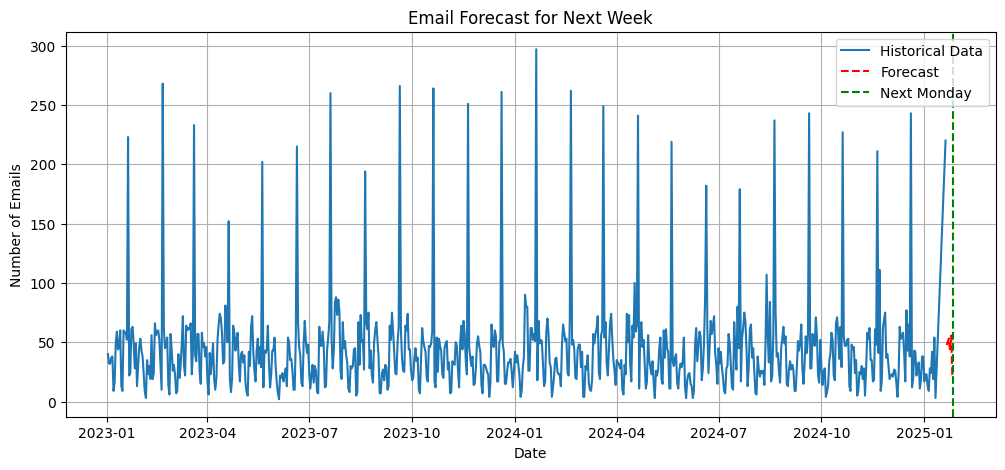

In [199]:

from statsmodels.tsa.holtwinters import ExponentialSmoothing

month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
df['month'] = df['month'].map(month_mapping)

df['datetime'] = pd.to_datetime(df[['date', 'month', 'year']].astype(str).agg('-'.join, axis=1), errors='coerce')


daily_counts = df.groupby('datetime').size()

model = ExponentialSmoothing(daily_counts, trend="add", seasonal="add", seasonal_periods=7)
fit = model.fit()

# Forecasting the next 7 days
forecast_days = 7
future_dates = pd.date_range(start=daily_counts.index[-1] + pd.Timedelta(days=1), periods=forecast_days)
forecast = fit.forecast(forecast_days)

forecast_series = pd.Series(forecast.values, index=future_dates)


coming_monday = future_dates[future_dates.weekday == 0][0]
monday_forecast = forecast_series.loc[coming_monday]
week_forecast = forecast_series.sum()

print(f"Forecasted emails on coming Monday ({coming_monday.date()}): {round(monday_forecast)}")
print(f"Forecasted emails in the coming week (Mon-Sun): {round(week_forecast)}")


plt.figure(figsize=(12, 5))
plt.plot(daily_counts.index, daily_counts, label="Historical Data")
plt.plot(forecast_series.index, forecast_series, label="Forecast", linestyle="dashed", color="red")
plt.axvline(x=coming_monday, color="green", linestyle="--", label="Next Monday")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Number of Emails")
plt.title("Email Forecast for Next Week")
plt.grid()
plt.show()





<ipython-input-200-f340eb629487>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unfiltered['month'] = df_unfiltered['month'].map(month_mapping)
<ipython-input-200-f340eb629487>:12: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_unfiltered['datetime'] = pd.to_datetime(df_unfiltered[['date', 'month', 'year']].astype(str).agg('-'.join, axis=1), errors='coerce')
<ipython-input-200-f340eb629487>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

Forecasted emails on coming Monday (2025-01-06): 31
Forecasted emails in the coming week (Mon-Sun): 205


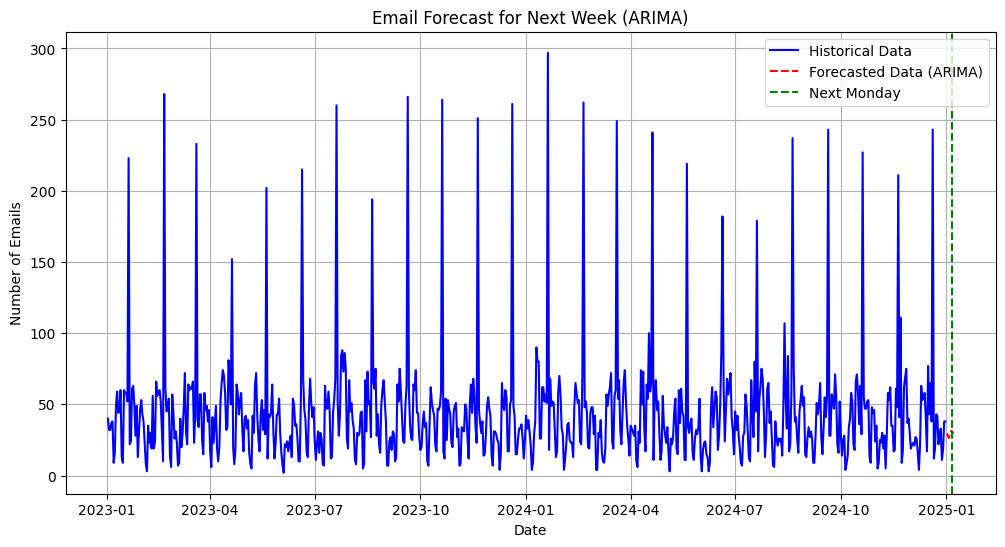

In [200]:
from statsmodels.tsa.arima.model import ARIMA


month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}


df_unfiltered['month'] = df_unfiltered['month'].map(month_mapping)

df_unfiltered['datetime'] = pd.to_datetime(df_unfiltered[['date', 'month', 'year']].astype(str).agg('-'.join, axis=1), errors='coerce')


daily_counts_unfiltered = df_unfiltered.groupby('datetime').size().reset_index(name='email_count')


daily_counts_unfiltered.set_index('datetime', inplace=True)

# Fitting the ARIMA model (p, d, q)
model = ARIMA(daily_counts_unfiltered['email_count'], order=(5, 1, 0))  # p=5, d=1, q=0
model_fit = model.fit()


forecast_days = 7
forecast = model_fit.forecast(steps=forecast_days)


last_date = daily_counts_unfiltered.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_days + 1, freq='D')[1:]


forecast_df = pd.DataFrame({'ds': future_dates, 'forecast': forecast})


next_monday = future_dates[future_dates.weekday == 0][0]  # Get next Monday's date
monday_forecast = forecast_df.loc[forecast_df['ds'] == next_monday, 'forecast'].values[0]


week_forecast = forecast_df['forecast'].sum()

print(f"Forecasted emails on coming Monday ({next_monday.date()}): {round(monday_forecast)}")
print(f"Forecasted emails in the coming week (Mon-Sun): {round(week_forecast)}")
plt.figure(figsize=(12, 6))
plt.plot(daily_counts_unfiltered.index, daily_counts_unfiltered['email_count'], label="Historical Data", color='blue')
plt.plot(forecast_df['ds'], forecast_df['forecast'], label="Forecasted Data (ARIMA)", linestyle="--", color='red')
plt.axvline(x=next_monday, color='green', linestyle="--", label="Next Monday")

plt.title("Email Forecast for Next Week (ARIMA)")
plt.xlabel("Date")
plt.ylabel("Number of Emails")
plt.legend()
plt.grid(True)
plt.show()



# USING EXPONENTIAL SMOOTHING MODEL

Forecasted emails on coming Monday : 20

Forecasted emails in the coming week (Mon-Sun): 293



# USING ARIMA MODEL

Forecasted emails on coming Monday: 31

Forecasted emails in the coming week (Mon-Sun): 205

